<a href="https://colab.research.google.com/github/SuhnDev/Beyond-Linear-Max/blob/main/notebooks/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'Beyond-Linear-Max'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 147 (delta 70), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (147/147), 355.43 KiB | 2.91 MiB/s, done.
Resolving deltas: 100% (70/70), done.
/content/Beyond-Linear-Max
n=  2000 | Linear=0.000030 sec | Cost-Aware=0.000132 sec
n=  5000 | Linear=0.000067 sec | Cost-Aware=0.000318 sec
n= 10000 | Linear=0.000137 sec | Cost-Aware=0.000691 sec
n= 20000 | Linear=0.000310 sec | Cost-Aware=0.001265 sec
n= 40000 | Linear=0.000558 sec | Cost-Aware=0.002675 sec
Figure(800x500)


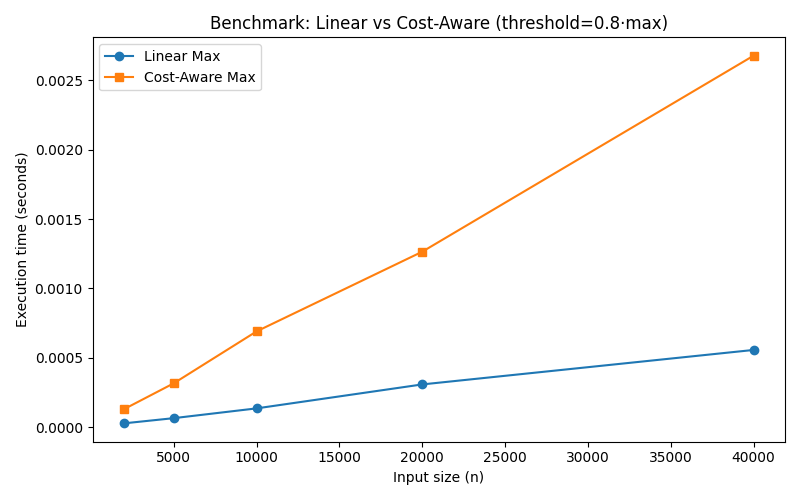

In [2]:
##----------------------------------
## 📌 Choose one scenario (uncomment)

args = "--compare"
## Baseline comparison (no post-processing)
## Linear vs Cost-Aware on plain max search
## → Cost-Aware may be slightly slower due to filtering overhead

# args = "--compare --post-iters 1500 --threshold 0.8 --seed 42"
## Heavy post-processing comparison
## Linear: applies expensive work to every element
## Cost-Aware: applies expensive work only to candidates (~top 20%)
## → Cost-Aware becomes much faster when post-processing dominates

# args = "--compare --known-upper 1000000 --post-iters 1500 --threshold 0.8 --seed 42"
## Known upper bound scenario
## The true maximum possible value is already known
## → Skip the initial scan and directly compute cutoff
## → Further improves Cost-Aware efficiency, especially for large n

# args = "--compare --sample-size 1000 --post-iters 1500 --threshold 0.8 --seed 42"
## Sample-based upper bound estimation
## Estimate cutoff from a small random sample (1000 elements)
## → Reduces overhead for large n
## → But if the sample underestimates the max, the candidate set grows and speedup decreases

##----------------------------------

!git clone https://github.com/SuhnDev/Beyond-Linear-Max.git
%cd Beyond-Linear-Max

!python cost_aware_maximum_finding.py $args --plot

from IPython.display import Image, display
display(Image("demo_plot.png"))
